# Zipfs law

## Definition
Let $F_n$ be the frequency (total number of occurences of the word in the text) of the n-th word in the text.
Then $F_n$ is proportional to $ 1/(n^a) $, where a is a constant. This relationsship is an empirical observation that hold true for most texts and languages.

In [1]:
import re

# Map words to number of occurences.
word_count: dict[str, int] = {}

# Total word count.
total_count: int = 0

def tokenize(text: str) -> list[str]:
    WORD_PATTERN = '[a-zA-Z]+'
    return re.findall(WORD_PATTERN, str(text).lower())

def count_words_in_file(file: str) -> tuple[dict[str, int], int]:
    counts: dict[str, int] = {} 
    total_count: int = 0
    with open(file) as file:
        for line in file:
            words = tokenize(line)
            for word in words:
                total_count += 1
                if word not in counts:
                    counts[word] = 1
                else:
                    counts[word] += 1
    return counts, total_count

In [2]:
word_count, total_count = count_words_in_file('GoetheFaust.txt')
print(f"Faust has {len(word_count)} unique words and {total_count} words in total")

Faust has 5826 unique words and 33830 words in total


In [3]:
word_frequencys = sorted(list(word_count.items()), key=lambda x: x[1], reverse=True)

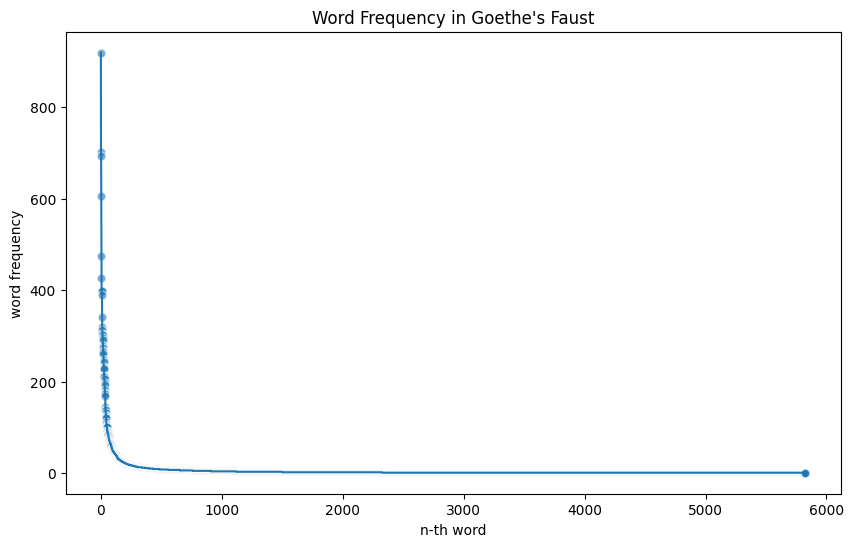

In [4]:
import matplotlib.pyplot as plt

x_val = [(i + 1) for i in range(len(word_frequencys))]
y_val = [pair[1] for pair in word_frequencys]

plt.figure(figsize=(10, 6))
plt.title('Word Frequency in Goethe\'s Faust')
plt.scatter(x_val, y_val, alpha=0.6, edgecolors='w', s=40, label='Empirical Data')
plt.plot(x_val, y_val)
plt.xlabel('n-th word')
plt.ylabel('word frequency')
plt.show()



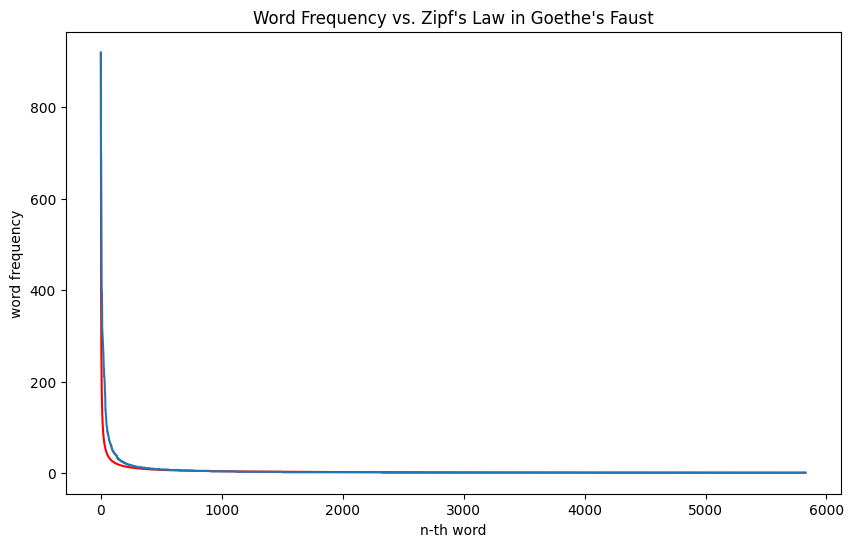

In [5]:
import numpy as np

def zipf_law(x: np.array, C: float = 1.0, a: float = 1) -> np.array:
    return C / (x ** a)

y_zipf = zipf_law(np.array(x_val), 919, 0.78)

plt.figure(figsize=(10, 6))
plt.title('Word Frequency vs. Zipf\'s Law in Goethe\'s Faust')
plt.plot(x_val, y_zipf, color='red', label=f'Zip\'s law')
plt.plot(x_val, y_val)

plt.xlabel('n-th word')
plt.ylabel('word frequency')
plt.show()